<a href="https://colab.research.google.com/github/IsraaFahmy/Hybrid-Images/blob/main/Hybrid_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow



Part I: Gauusian Filter for both Low and high pass filters

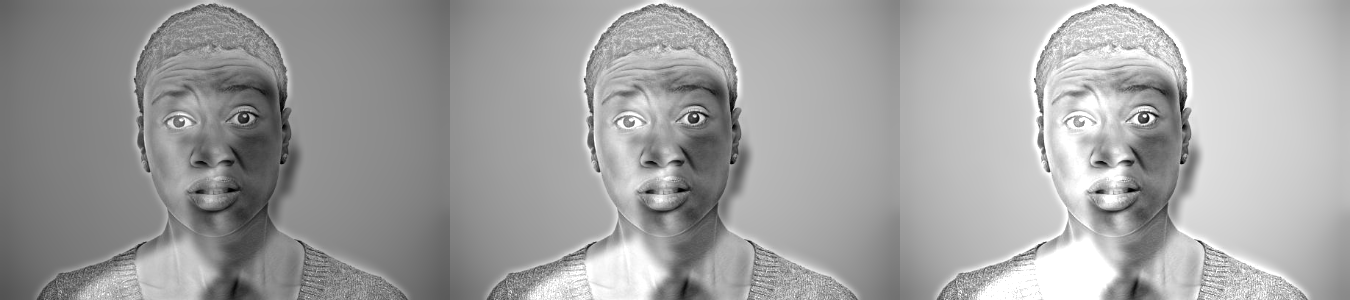

In [ ]:
#change path to images
image1_path= '/content/sad.jpeg'
image2_path= '/content/happy.jpeg'
image3_path= '/content/confused.jpeg'



def load_and_resize_pair(image_path1, image_path2):
    # Load the images in grayscale
    image1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE).astype(float)
    image2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE).astype(float)


    # Determine the size to which both images should be resized
    target_height = min(image1.shape[0], image2.shape[0])
    target_width = min(image1.shape[1], image2.shape[1])

    # Resize both images to the determined size
    image1_resized = cv2.resize(image1, (target_width, target_height))
    image2_resized = cv2.resize(image2, (target_width, target_height))

    return image1_resized, image2_resized

image1,image2= load_and_resize_pair(image2_path, image3_path)

def GaussianBlur(image1, image2, sigma_low, sigma_high, filter_size_low, filter_size_high, gain_low, gain_high):
    # Create a Gaussian filter for the low-pass filter
    low_pass = cv2.GaussianBlur(image1, (filter_size_low, filter_size_low), sigma_low)

    # Create a high-pass filter by subtracting a low-pass filtered image from the original
    low_pass_for_high = cv2.GaussianBlur(image2, (filter_size_high, filter_size_high), sigma_high)
    high_pass = image2 - low_pass_for_high

    # Apply the gain values
    low_pass *= gain_low
    high_pass *= gain_high

    # Combine the two filtered images to create the hybrid image
    hybrid_image = (low_pass + high_pass)

    return hybrid_image

# Parameters for the experiment
sigmas = [3, 5, 7] # alter the value of sigma
filter_size = 15  # A common filter size for the experiment

hybrid1 = GaussianBlur(image1, image2, sigmas[1], sigmas[1], filter_size, filter_size, 0.8,0.8 )
hybrid2 = GaussianBlur(image1, image2, sigmas[1], sigmas[1], filter_size, filter_size, 1, 1)
hybrid3 = GaussianBlur(image1, image2, sigmas[1], sigmas[1], filter_size, filter_size, 1.2, 1.2)

combined = np.hstack(( hybrid1, hybrid2, hybrid3))


cv2_imshow(combined)

cv2.waitKey(0)
cv2.destroyAllWindows()


Part II:  Experiments with different types of filters


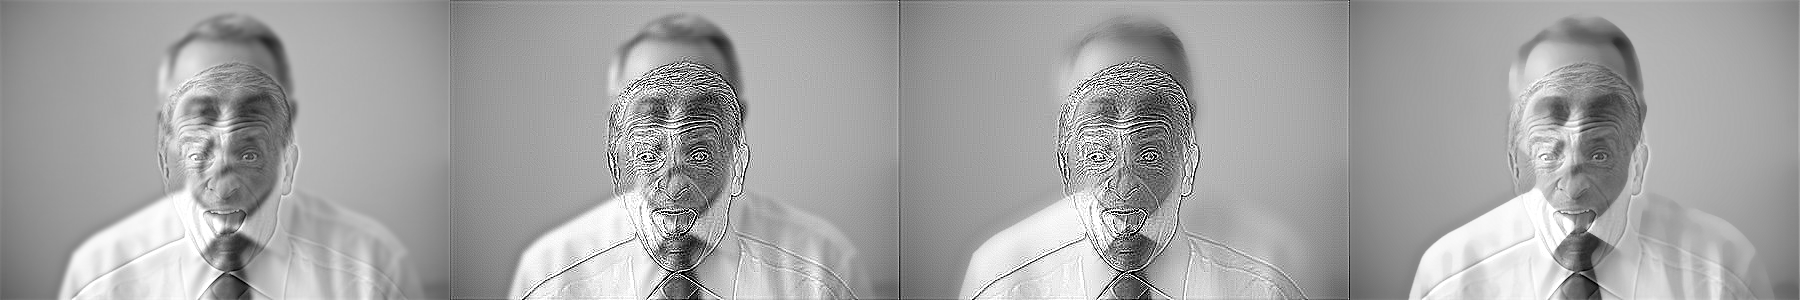

In [ ]:


def create_hybrid_image(image1, image2, filter_type):
    if filter_type == "bilateral_laplacian":
        # Low-pass using Bilateral filter
        image1 = image1.astype(np.float32)
        low_pass = cv2.bilateralFilter(image1, 29, 75, 75)
        scale_factor = 3 # Adjustable
        high_pass = scale_factor * cv2.Laplacian(image2, cv2.CV_64F)


    elif filter_type == "median_gaussian":
        image1_unit8 = (image1).astype(np.uint8)
        image2_unit8 = (image2).astype(np.uint8)
        # Low-pass using Median filter
        low_pass = cv2.medianBlur(image1_unit8, 13)

        # High-pass using Gaussian filter
        blurred = cv2.GaussianBlur(image2, (13, 13), 0)
        high_pass = image2 - blurred

    elif filter_type == "gaussian_gaussian":
        # Low-pass using Gaussian filter
        low_pass = cv2.GaussianBlur(image1, (13, 13), 0)

        # High-pass using Gaussian filter
        blurred = cv2.GaussianBlur(image2, (13, 13), 0)
        high_pass = image2 - blurred

    elif filter_type == "gaussian_laplacian":
        # Low-pass using Gaussian filter
        low_pass = cv2.GaussianBlur(image1, (13, 13), sigmaX=0, sigmaY=0)

        scale_factor = 3 # this is variable
        high_pass = scale_factor * cv2.Laplacian(image2, cv2.CV_64F)


    else:
        raise ValueError("Invalid filter type")

    # Combine the two filtered images to create the hybrid image
    hybrid_image = low_pass + high_pass
    return hybrid_image

image1, image2 = load_and_resize_pair(image1_path, image2_path)

# Create hybrid images using different filter combinations
hybrid_gaussian_gaussian = create_hybrid_image(image1, image2, "gaussian_gaussian")
hybrid_gaussian_laplacian = create_hybrid_image(image1, image2, "gaussian_laplacian")
hybrid_bilateral_laplacian = create_hybrid_image(image1, image2, "bilateral_laplacian")
hybrid_median_gaussian = create_hybrid_image(image1, image2, "median_gaussian")

combined = np.hstack((hybrid_gaussian_gaussian, hybrid_gaussian_laplacian, hybrid_bilateral_laplacian, hybrid_median_gaussian))

cv2_imshow(combined)

cv2.waitKey(0)
cv2.destroyAllWindows()
